In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/__results__.html
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/vectorizedData.csv
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/__notebook__.ipynb
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/__output__.json
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/custom.css
/kaggle/input/2-recommended-reads-conversion-of-data-to-num/__results___files/__results___9_0.png


In [2]:
from sklearn.neighbors import NearestNeighbors
from gensim.models import KeyedVectors
import numpy as np
import ast
import pandas as pd

# Veri setini yükleme
data_path = '/kaggle/input/2-recommended-reads-conversion-of-data-to-num/vectorizedData.csv'
data = pd.read_csv(data_path)
data = data.drop_duplicates(subset=['booktitle', 'authorname'], keep='first')
data["word2vec"] = data["word2vec"].apply(lambda x: x.strip('[]'))
data["word2vec"] = data["word2vec"].apply(lambda x: x.split())
data["word2vec"] = data["word2vec"].apply(lambda x:  [float(y) for y in x])

# Google News Binary modelinin yolu
model_path = '/kaggle/input/googlenewsvectors/GoogleNews-vectors-negative300.bin'

# Google News Binary modelini yükleme
word_vectors = KeyedVectors.load_word2vec_format(model_path, binary=True)

# Kullanıcının girdiği kitap betimlemesi
user_description = 'a space adventure with friends'
user_vector = np.mean([word_vectors[word] for word in user_description.split() if word in word_vectors.key_to_index], axis=0)

nn_model = NearestNeighbors(n_neighbors=10, metric='cosine')
X = np.array(data["word2vec"].tolist())
nn_model.fit(X)

distances, indices = nn_model.kneighbors([user_vector])
recommended_books = data.iloc[indices[0]][['booktitle', 'authorname']].values.tolist()

# Yakınlık oranlarını hesaplama ve yüzde olarak gösterme
print("Kullanıcının girdiği kitaba benzer kitaplar:")
for i, book in enumerate(recommended_books):
    similarity = 1 - distances[0][i]
    similarity_percent = round(similarity * 100, 2)
    print(f"{book[0]} by {book[1]} ({similarity_percent}%)")


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Kullanıcının girdiği kitaba benzer kitaplar:
Space Dumplins by Craig Thompson (63.8%)
Toys in Space by Mini Grey (61.37%)
Star Trek: The Next Generation / Doctor Who: Assimilation2, Volume 1 by Scott Tipton (61.21%)
Gateway by Frederik Pohl (60.89%)
Joyride Vol. 2 by Jackson Lanzing (60.84%)
Shadow Captain by Alastair Reynolds (60.52%)
Until Midnight by Melissa Landers (60.46%)
Space Battleship Yamato: The Classic Collection by Leiji Matsumoto (60.32%)
Willful Child by Steven Erikson (60.11%)
A Closed and Common Orbit by Becky Chambers (60.1%)


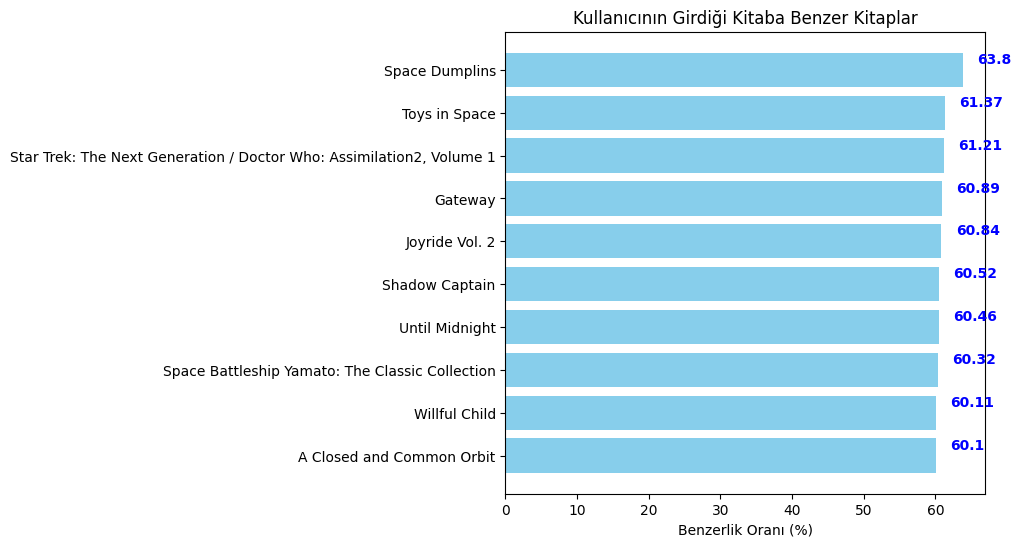

In [3]:
import matplotlib.pyplot as plt

books = [book[0] for book in recommended_books]
similarity_percents = [round((1 - distance) * 100, 2) for distance in distances[0]]

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(books, similarity_percents, align='center', color='skyblue')
ax.set_xlabel('Benzerlik Oranı (%)')
ax.set_title('Kullanıcının Girdiği Kitaba Benzer Kitaplar')

plt.subplots_adjust(left=0.3)

for i, v in enumerate(similarity_percents):
    ax.text(v + 2, i - 0.15, str(v), color='blue', fontweight='bold')
    
plt.gca().invert_yaxis()
plt.show()
